In [1]:
import pandas as pd

stats_df = pd.read_csv('training_data.csv')
stats_df

,PLAYER_ID,PLAYER_NAME,SEASON,FG3A,FG3_PCT,FGA,FG_PCT,FTA,FT_PCT,TOV,...,AST_RATIO,OREB_PCT,DREB_PCT,EFG_PCT,USG_PCT,PCT_FGA_2PT,PCT_PTS_FT,PCT_PTS_2PT_MR,PCT_PTS_PAINT,PCT_UAST_FGM
0,201151,Acie Law,2007-08,-0.566049,-0.385669,-0.706845,-1.038548,-0.869026,0.367948,0.493596,...,1.177852,-0.986302,-1.456567,-1.704459,-0.718280,0.409725,-0.267666,-0.104248,0.783468,1.620247
1,1733,Al Harrington,2007-08,1.726300,0.673541,1.096773,-0.441738,-0.254101,0.179325,-0.780948,...,-0.729627,-0.036757,0.525421,0.385205,0.363467,-1.160595,-0.753252,-0.746075,-0.460773,-0.493196
2,201143,Al Horford,2007-08,-1.128323,-1.676776,-0.842967,0.733797,-0.310004,-0.271274,-0.143676,...,-0.560610,1.709182,1.827315,0.012790,-0.696645,1.123985,0.184431,-0.224056,1.205621,-0.462478
3,2744,Al Jefferson,2007-08,-1.128323,-1.676776,1.981567,0.751882,0.752140,-0.376065,0.174960,...,-1.272897,1.801073,1.905040,0.033480,1.748103,1.144992,-0.217433,-0.147037,1.288940,0.557382
4,201154,Al Thornton,2007-08,-0.220034,0.397771,0.858559,-0.532164,0.696237,-0.145525,0.174960,...,-1.055589,0.024504,-0.076948,-0.918249,0.990880,0.378214,0.586296,0.366425,-0.021956,0.078171
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3912,203115,Will Barton,2019-20,0.161583,0.465049,0.250801,-0.178823,-0.443946,0.009884,-0.398860,...,0.315277,0.000741,0.188775,-0.154797,0.124078,-0.011615,-0.620143,0.098933,-0.014320,0.783265
3913,1626161,Willie Cauley-Stein,2019-20,-1.944105,-3.631091,-0.857184,1.694639,-0.601016,-1.684227,-0.905324,...,-0.190635,1.060487,1.211353,0.872574,-0.847747,1.989782,-0.855311,-0.362532,2.322902,-0.831119
3914,201163,Wilson Chandler,2019-20,0.356554,-0.288640,-1.106481,-0.846879,-1.176941,1.093694,-0.398860,...,-0.364090,-0.860304,0.504844,-0.485024,-1.141129,-1.413111,-0.945761,-0.314795,-0.727370,-0.655999
3915,203897,Zach LaVine,2019-20,1.331410,0.519664,2.134376,-0.178823,1.283829,0.378169,2.006843,...,-0.436363,-0.694718,-0.220257,-0.099760,2.232755,-0.084017,0.447162,-0.171581,-0.195412,0.996692


In [2]:
X_train = stats_df.iloc[:,3:]

We used Principal Component Analysis to reduce our 24 features to a more manageable number of components. We plotted # of components against total variance explained and gound that it was reasonable to use 10 components, explaining over 90% of the variance.

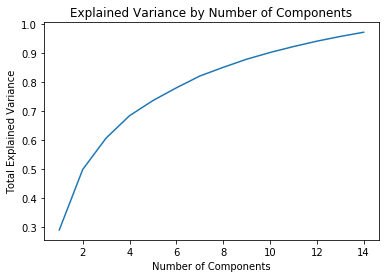

In [3]:
from sklearn.decomposition import PCA
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

def pca_analysis():
    xs = list(range(1,15))
    ys = []
    for n in xs:
        pca = PCA(n)
        X_pca = pca.fit_transform(X_train)
        ys.append(sum(pca.explained_variance_ratio_))
    plt.plot(xs, ys)
    plt.title('Explained Variance by Number of Components')
    plt.xlabel('Number of Components')
    plt.ylabel('Total Explained Variance')
    plt.show()

pca_analysis()

In [190]:
pca = PCA(10, random_state=3000)
pca_names = ['Big','Vol. Scorer','Pure Passer','Eff. Scorer',
            'Draw Foul','Bad Def','Eff. FT','Peri. Def','Ins. Def','Off. Big']
X_pca = pd.DataFrame(pca.fit_transform(X_train), columns = pca_names)

We found the dot product of our training set and the principal components to see which stats contributed to each component. 

In [191]:
dot_matrix = np.dot(X_train.to_numpy().T, X_pca.to_numpy())
df_dotproduct = pd.DataFrame(dot_matrix)
df_dotproduct.index = list(X_train.columns)
df_dotproduct

,0,1,2,3,4,5,6,7,8,9
FG3A,-8107.619262,-2028.771194,-2374.017799,624.187347,1171.578197,135.767607,-697.620397,-342.967961,144.415623,102.482590
FG3_PCT,-7173.673080,-1508.321516,-1549.996086,793.947781,-34.632538,-113.940574,-178.387827,-105.999616,-380.336088,-87.236984
FGA,-4465.121080,6247.720528,-2381.198434,-1080.188557,-214.893154,-232.264974,-1124.677784,236.007378,121.416814,-93.144070
FG_PCT,7602.466355,2734.856158,-1103.757826,2042.767533,-1377.286291,314.322346,209.928105,48.468304,-108.995383,-652.104263
FTA,726.616062,7628.621278,-1048.439989,1.618077,1300.329277,83.417305,905.180320,169.929763,65.868225,31.797004
FT_PCT,-6657.506676,910.179019,-1847.021715,-486.531901,-600.604576,-380.047146,1531.300547,-709.344668,-735.716533,-238.060495
TOV,-2265.893007,6547.317895,2170.637807,433.666830,470.070929,77.523455,-803.307729,-971.342307,59.260560,-112.350230
STL,-2649.033417,1123.428335,2562.219731,1693.306940,1153.638503,-1117.630624,-728.654598,1504.004422,-1552.997975,-150.650464
BLK,7738.122269,1233.007580,-641.928636,17.578631,212.842670,-689.668497,-422.824546,-574.621572,-176.564483,362.843721
PTS,-2892.873406,7106.414146,-3011.505029,25.900927,-40.561877,-70.130444,-448.595367,119.213905,17.727429,-224.933611


**Clustering**

We tried three clustering algorithms on our transformed data: DBSCAN, KMeans, and Agglomerative Clustering. DBSCAN was very difficult to tune and we weren't able to find a set of hyperparameters that produced good clusters. KMeans did a great job of making consistent clusters that made sense, but it put all superstar players into one cluster regardless of position. Agglomerative Clustering was less consistent than KMeans but it had a cluster for superstar guards/wings and a cluster for superstar bigs. We decided that it was best to use KMeans as it had the best and most consistent clusters.

In [192]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

cluster = KMeans(n_clusters=10, random_state=3000).fit(X_pca)
#cluster = AgglomerativeClustering(n_clusters=10).fit(X_pca)
X_pca['target'] = pd.Series(cluster.labels_)
X_pca['name'] = stats_df.iloc[:,1]
X_pca['season'] = stats_df.iloc[:,2]
X_pca

,Big,Vol. Scorer,Pure Passer,Eff. Scorer,Draw Foul,Bad Def,Eff. FT,Peri. Def,Ins. Def,Off. Big,target,name,season
0,-1.380095,-0.799479,3.596739,-0.974457,-0.105606,0.763468,0.298380,0.173411,0.393462,-0.808983,8,Acie Law,2007-08
1,-0.924876,-0.591512,-2.405597,0.486691,1.083274,0.131586,-1.506310,-0.309553,-1.077012,0.402981,5,Al Harrington,2007-08
2,3.860539,-0.084762,0.469611,-0.566098,-0.267009,0.368577,0.216223,-0.211279,-0.293727,0.870980,4,Al Horford,2007-08
3,2.739847,3.424104,-1.355272,-1.812366,-0.508878,1.473727,-1.635802,0.829404,0.120741,0.677170,1,Al Jefferson,2007-08
4,-0.065514,1.086184,-0.645139,-2.395911,0.614187,0.522764,-0.174618,0.121639,0.129544,-0.457381,2,Al Thornton,2007-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3912,-0.782939,-0.070461,-0.085545,0.657939,-0.781790,-0.384052,-0.228714,0.533820,0.678613,0.730085,2,Will Barton,2019-20
3913,5.915241,-0.379990,1.887635,-0.101031,-0.643924,-0.330188,-1.094084,1.033218,-0.080463,-0.922816,4,Willie Cauley-Stein,2019-20
3914,-0.270270,-3.275699,0.124648,-1.389078,0.700419,-0.092414,0.031925,-1.478011,0.088600,-0.338941,7,Wilson Chandler,2019-20
3915,-2.670116,3.694344,-0.896356,-0.344619,0.963957,0.461360,-1.386426,0.313762,0.142638,-0.704771,3,Zach LaVine,2019-20


You can change the 'target' number to change the position cluster. You can change the season for any year from 2007-08 to 2019-20.

In [255]:
X_pca[X_pca['target'] == 9][X_pca['season'] == '2019-20']


/Users/liamsmeraglia/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Big,Vol. Scorer,Pure Passer,Eff. Scorer,Draw Foul,Bad Def,Eff. FT,Peri. Def,Ins. Def,Off. Big,target,name,season
3617,1.669356,-0.321601,-1.860848,-0.230274,0.571825,0.852580,-1.293756,-2.134283,-0.409794,0.116556,9,Aron Baynes,2019-20
3682,2.902749,-0.850690,0.054285,-2.104244,1.801320,-1.471914,-1.580685,-2.074790,-1.625879,0.879062,9,Dewayne Dedmon,2019-20
3715,1.799626,-0.513986,0.116511,-0.990889,1.425909,-2.347614,-0.637127,-0.636494,-0.803740,-0.370170,9,Gorgui Dieng,2019-20
3758,2.029522,-0.039945,0.018502,-0.500424,0.305214,-2.063238,-0.544245,0.770043,-1.084929,0.248066,9,Jonathan Isaac,2019-20
3835,1.758184,-0.747041,-1.290753,-1.019856,0.443599,-1.211922,0.132748,-0.638046,-0.020216,0.490148,9,Myles Turner,2019-20
3867,0.768404,0.468372,-0.265500,-2.242592,-1.512228,1.432931,1.137903,1.160760,-0.872031,0.542718,9,Rui Hachimura,2019-20
3876,4.631487,-0.499962,0.669029,-0.792094,-1.942100,-1.070406,0.290210,-2.403745,-0.661800,-0.564503,9,Skal Labissiere,2019-20
3883,4.219801,-0.566856,0.597568,-1.199112,-1.927605,1.172799,-0.390468,-0.285373,-1.038359,-1.562130,9,Taj Gibson,2019-20


You can change the 'name' to view a player's position cluster over his career.

In [244]:
X_pca[X_pca['name'] == 'Nick Young']

,Big,Vol. Scorer,Pure Passer,Eff. Scorer,Draw Foul,Bad Def,Eff. FT,Peri. Def,Ins. Def,Off. Big,target,name,season
205,-1.726000,1.363176,-0.194292,-1.681316,0.229277,0.467073,-0.763532,-0.538349,-0.769714,-1.711011,2,Nick Young,2007-08
474,-1.908387,0.639942,-0.701579,-2.001594,-0.829502,0.154541,0.339048,0.262652,0.300296,-1.246588,2,Nick Young,2008-09
758,-1.716251,-1.044073,-1.716257,-1.936883,-0.005295,-0.229908,0.157936,-0.064637,-0.107464,-1.007433,2,Nick Young,2009-10
1046,-2.287785,0.367131,-2.215257,-2.230605,-0.634596,0.244055,-0.194795,0.516911,0.059219,-1.207314,2,Nick Young,2010-11
1341,-2.643013,0.053446,-2.034419,-2.161663,0.083782,0.366035,-0.142917,0.087302,-0.322308,-1.012438,2,Nick Young,2011-12
1639,-2.049420,-0.987382,-1.354442,-1.668852,-0.034410,-0.377150,0.649104,0.489288,0.696617,-0.806237,2,Nick Young,2012-13
1928,-2.619634,1.607871,-2.891543,-0.956951,0.755701,0.712340,0.012770,0.157711,-0.172966,-0.866908,2,Nick Young,2013-14
2243,-3.185553,1.042377,-2.442409,-2.029700,1.580416,0.355939,0.779682,-0.123786,0.010224,-0.358210,2,Nick Young,2014-15
2555,-3.130996,-2.626398,-1.554304,-2.759549,1.002129,0.819448,0.587231,0.676304,0.718076,0.423092,7,Nick Young,2015-16
2862,-2.390829,-2.239315,-3.295324,-0.499056,0.134032,1.529624,-0.604908,-0.233774,-0.912536,-0.651130,5,Nick Young,2016-17


In [205]:
labeled_df = stats_df
labeled_df['CLUSTER'] = pd.Series(cluster.labels_)
labeled_df

,PLAYER_ID,PLAYER_NAME,SEASON,FG3A,FG3_PCT,FGA,FG_PCT,FTA,FT_PCT,TOV,...,OREB_PCT,DREB_PCT,EFG_PCT,USG_PCT,PCT_FGA_2PT,PCT_PTS_FT,PCT_PTS_2PT_MR,PCT_PTS_PAINT,PCT_UAST_FGM,CLUSTER
0,201151,Acie Law,2007-08,-0.566049,-0.385669,-0.706845,-1.038548,-0.869026,0.367948,0.493596,...,-0.986302,-1.456567,-1.704459,-0.718280,0.409725,-0.267666,-0.104248,0.783468,1.620247,8
1,1733,Al Harrington,2007-08,1.726300,0.673541,1.096773,-0.441738,-0.254101,0.179325,-0.780948,...,-0.036757,0.525421,0.385205,0.363467,-1.160595,-0.753252,-0.746075,-0.460773,-0.493196,5
2,201143,Al Horford,2007-08,-1.128323,-1.676776,-0.842967,0.733797,-0.310004,-0.271274,-0.143676,...,1.709182,1.827315,0.012790,-0.696645,1.123985,0.184431,-0.224056,1.205621,-0.462478,4
3,2744,Al Jefferson,2007-08,-1.128323,-1.676776,1.981567,0.751882,0.752140,-0.376065,0.174960,...,1.801073,1.905040,0.033480,1.748103,1.144992,-0.217433,-0.147037,1.288940,0.557382,1
4,201154,Al Thornton,2007-08,-0.220034,0.397771,0.858559,-0.532164,0.696237,-0.145525,0.174960,...,0.024504,-0.076948,-0.918249,0.990880,0.378214,0.586296,0.366425,-0.021956,0.078171,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3912,203115,Will Barton,2019-20,0.161583,0.465049,0.250801,-0.178823,-0.443946,0.009884,-0.398860,...,0.000741,0.188775,-0.154797,0.124078,-0.011615,-0.620143,0.098933,-0.014320,0.783265,2
3913,1626161,Willie Cauley-Stein,2019-20,-1.944105,-3.631091,-0.857184,1.694639,-0.601016,-1.684227,-0.905324,...,1.060487,1.211353,0.872574,-0.847747,1.989782,-0.855311,-0.362532,2.322902,-0.831119,4
3914,201163,Wilson Chandler,2019-20,0.356554,-0.288640,-1.106481,-0.846879,-1.176941,1.093694,-0.398860,...,-0.860304,0.504844,-0.485024,-1.141129,-1.413111,-0.945761,-0.314795,-0.727370,-0.655999,7
3915,203897,Zach LaVine,2019-20,1.331410,0.519664,2.134376,-0.178823,1.283829,0.378169,2.006843,...,-0.694718,-0.220257,-0.099760,2.232755,-0.084017,0.447162,-0.171581,-0.195412,0.996692,3


In [256]:
labeled_df.to_csv('labeled_data.csv', index=False)

**Results**

In [213]:
def investigate_clusters():
    df = pd.DataFrame(columns = list(X_pca.columns)[:11])
    for i in range(10):
        df = df.append(X_pca[X_pca['target'] == i].mean(axis=0), ignore_index=True)
    return df

investigate_clusters()

,Big,Vol. Scorer,Pure Passer,Eff. Scorer,Draw Foul,Bad Def,Eff. FT,Peri. Def,Ins. Def,Off. Big,target
0,1.556963,-1.067564,1.216551,0.284810,0.657883,-0.225461,0.015036,0.825175,-0.140350,-0.030590,0.0
1,1.873846,2.627578,-0.878038,-0.580778,-0.310678,-0.327999,-0.171161,-0.034179,-0.029620,0.352802,1.0
2,-1.336145,0.334529,-0.979911,-0.726495,0.036636,0.222775,0.003029,0.277451,0.016219,-0.112682,2.0
3,-2.479060,4.159526,-0.848404,0.528580,0.443981,-0.139992,0.094892,0.101820,0.038860,0.066321,3.0
4,5.147985,0.431415,0.087810,0.782967,0.081782,0.420002,0.053173,-0.184682,0.157062,-0.203721,4.0
5,-1.467829,-2.182238,-1.869755,0.906524,-0.189372,0.110642,0.000303,-0.085258,-0.026851,-0.017697,5.0
6,-2.494913,1.884321,1.523126,0.479595,-0.102409,0.211912,0.067938,-0.217238,0.115759,-0.177456,6.0
7,-0.719133,-2.674850,-0.263473,-0.353394,0.576440,-0.092235,-0.131542,-0.003567,0.101855,0.117227,7.0
8,-1.855748,-0.853296,2.340238,0.380118,-0.570164,0.036676,0.051523,-0.300776,0.007620,0.085122,8.0
9,2.343986,-0.422245,0.185594,-1.673342,-0.847329,-0.730370,0.089667,-0.378370,-0.466859,0.068557,9.0
